In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_datareader as web
import datetime
import yfinance as yf

C:\Users\ksk76\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [17]:
# start = datetime.datetime(2020, 1, 1)
# end = datetime.datetime(2021, 1, 1)

# df = web.DataReader('AAPL', 'yahoo', start, end)
# df.head()

In [37]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 1, 1)

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


In [38]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349152,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


In [39]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
751,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959976,63814900
752,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142441,69007800
753,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400
754,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725311,75703700
755,2022-12-30,128.410004,129.949997,127.430000,129.929993,129.043137,77034200


In [40]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,74.059998,75.150002,73.797501,75.087502,135480400
1,74.287498,75.144997,74.125000,74.357498,146322800
2,73.447502,74.989998,73.187500,74.949997,118387200
3,74.959999,75.224998,74.370003,74.597504,108872000
4,74.290001,76.110001,74.290001,75.797501,132079200


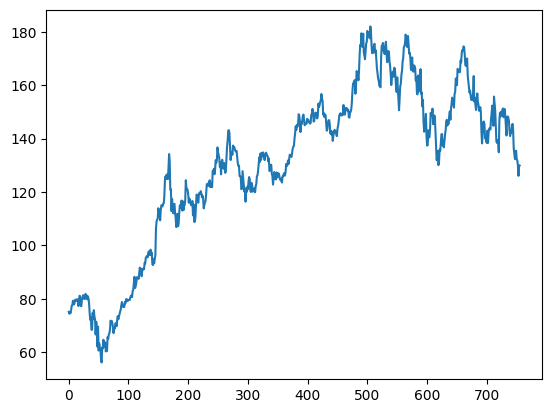

In [41]:
plt.plot(df.Close)

In [42]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    150.515600
752    150.157800
753    149.764699
754    149.412100
755    149.062199
Name: Close, Length: 756, dtype: float64

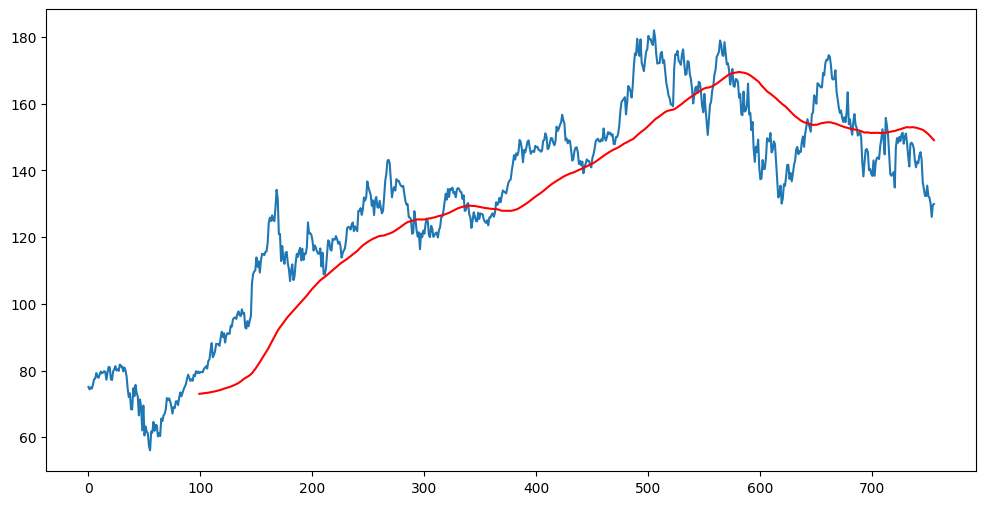

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [44]:
ma200 = df.Close.rolling(100).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    150.515600
752    150.157800
753    149.764699
754    149.412100
755    149.062199
Name: Close, Length: 756, dtype: float64

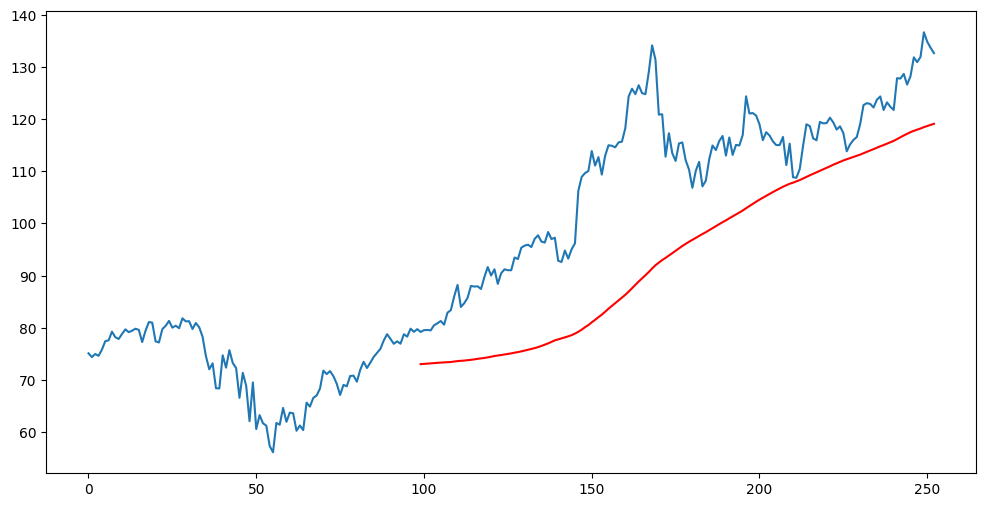

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma200, 'r')

In [45]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(529, 1)
(227, 1)


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [47]:
data_training_arr = scaler.fit_transform(data_training)

In [48]:
data_training_arr

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [49]:
x_train = []
y_train = []

In [51]:
data_training.shape

(529, 1)

In [53]:
for i in range(100, data_training.shape[0]):
    x_train.append(data_training_arr[i-100: i])
    y_train.append(data_training_arr[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [59]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
14/14 [==============================] - 10s 293ms/step - loss: 0.2571
Epoch 2/50
14/14 [==============================] - 5s 319ms/step - loss: 0.0308
Epoch 3/50
14/14 [==============================] - 4s 295ms/step - loss: 0.0227
Epoch 4/50
14/14 [==============================] - 4s 293ms/step - loss: 0.0161
Epoch 5/50
14/14 [==============================] - 4s 291ms/step - loss: 0.0210
Epoch 6/50
14/14 [==============================] - 4s 293ms/step - loss: 0.0160
Epoch 7/50
14/14 [==============================] - 5s 351ms/step - loss: 0.0141
Epoch 8/50
14/14 [==============================] - 5s 356ms/step - loss: 0.0138
Epoch 9/50
14/14 [==============================] - 5s 343ms/step - loss: 0.0139
Epoch 10/50
14/14 [==============================] - 5s 371ms/step - loss: 0.0122
Epoch 11/50
14/14 [==============================] - 5s 352ms/step - loss: 0.0143
Epoch 12/50
14/14 [==============================] - 5s 345ms/step - loss: 0.0134
Epoch 13/50
14/14 [=====

In [60]:
model.save('keras_model.h5')

C:\Users\ksk76\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
data_testing.head()

,Close
529,171.660004
530,174.830002
531,176.279999
532,172.119995
533,168.639999


In [62]:
past_100_days = data_training.tail(100)

In [78]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\ksk76\AppData\Local\Temp\ipykernel_9860\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [79]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [80]:
final_df.head()

,Close
0,149.029999
1,148.789993
2,146.059998
3,142.940002
4,143.429993


In [81]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.41075577],
       [0.40646766],
       [0.3576916 ],
       [0.30194753],
       [0.31070205],
       [0.35393974],
       [0.37144905],
       [0.37305699],
       [0.34536352],
       [0.28354484],
       [0.29998218],
       [0.27621942],
       [0.29676603],
       [0.23405396],
       [0.26925141],
       [0.28515278],
       [0.30820072],
       [0.30123271],
       [0.29962477],
       [0.27639799],
       [0.26567812],
       [0.3165981 ],
       [0.33589419],
       [0.36644639],
       [0.40593168],
       [0.41486504],
       [0.41879574],
       [0.40468115],
       [0.40378776],
       [0.41593727],
       [0.40753989],
       [0.4740041 ],
       [0.42451322],
       [0.40950524],
       [0.42844392],
       [0.45470801],
       [0.44523868],
       [0.45095588],
       [0.43594791],
       [0.4425585 ],
       [0.3909237 ],
       [0.39003031],
       [0.42790794],
       [0.42808651],
       [0.44595322],
       [0.49044145],
       [0.56869748],
       [0.616

In [82]:
input_data.shape

(327, 1)

In [83]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [71]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(227, 100, 1)
(227,)


In [84]:
#Predictions
y_predicted = model.predict(x_test)

ValueError: in user code:

    File "C:\Users\ksk76\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ksk76\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ksk76\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ksk76\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\ksk76\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ksk76\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "sequential" expects 1 input(s), but it received 227 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 1) dtype=float32>]


In [73]:
y_predicted.shape

(227, 1)

In [74]:
scaler.scale_

array([0.01786672])

In [76]:
scale_factor = 1/0.01786672
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

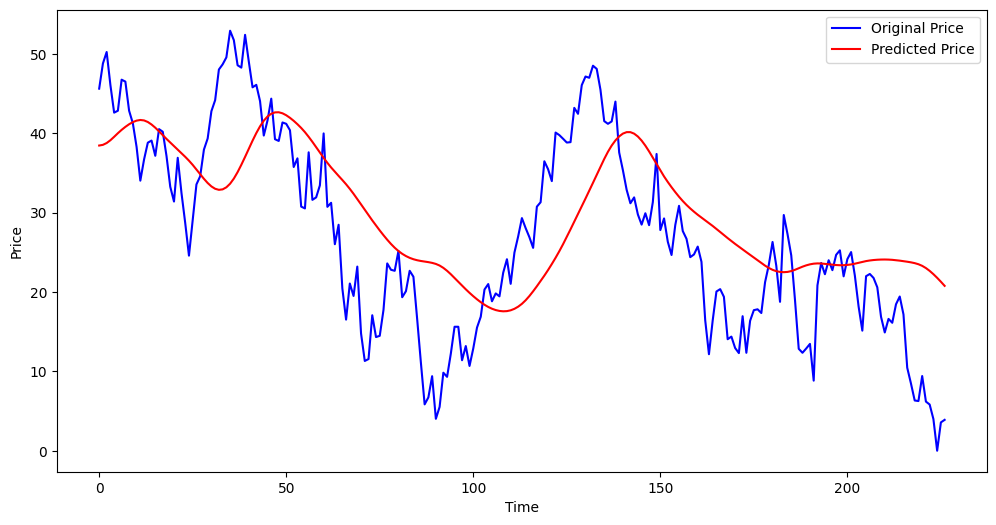

In [77]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()